Importamos paquetes necesarios

In [26]:
%load_ext autoreload
%autoreload 2
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.io.ascii import read
# from scipy import constants as const
# from google.colab import drive
# drive.mount('/content/drive')
import os

dir = 'c:\\Users\\Pablo\\OneDrive - Universidad de La Laguna\\Master\\Cuatri1\\AtmosferasEstelares\\CosasDuranteCurso\\Entregables\\_github\\2_AtmosphereModel'
os.chdir(dir)
print(os.getcwd())
from _package.Functions import *
os.chdir(dir+'\\notebooks')

print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Pablo\OneDrive - Universidad de La Laguna\Master\Cuatri1\AtmosferasEstelares\CosasDuranteCurso\Entregables\_github\2_AtmosphereModel
c:\Users\Pablo\OneDrive - Universidad de La Laguna\Master\Cuatri1\AtmosferasEstelares\CosasDuranteCurso\Entregables\_github\2_AtmosphereModel\notebooks


Variables y constantes conocidas

In [10]:
# # Conversiones: 1 J = 6.242e18 eV = 1e7 erg; 1 eV = 1.602e-12 erg
# # 1 m = 1e10 A

# k_B_Julios = const.Boltzmann # J/K
# k_B = k_B_Julios * 1e7 # erg / K
# k_B_eV = k_B_Julios *6.242e18 # eV/K

# print(k_B_eV)


# c_SI = const.speed_of_light
# c = c_SI * 100 # cm/s

# print (c)

# h_SI = const.h # J*S
# h = h_SI *1e7 # erg*s

# print(h)

# R_Rydb = 1.0968e5 #cm-1

# e = const.physical_constants['elementary charge'][0] * 10 * c_SI # Fr (Franklin cgs) = dyn^(1/2) * cm
# m_e = 9.1094e-28 # g
# print(e)

Lectura de datos de los archivos .dat

In [27]:
# data_t4 = read('/content/drive/MyDrive/Atmosferas/t4000.dat', header_start=24, data_start=25)
# data_t6 = read('/content/drive/MyDrive/Atmosferas/t6000.dat', header_start=24, data_start=25)
# data_t8 = read('/content/drive/MyDrive/Atmosferas/t8000.dat', header_start=24, data_start=25)
data_t4 = read('../data/t4000.dat', header_start=24, data_start=25)
data_t6 = read('../data/t6000.dat', header_start=24, data_start=25)
data_t8 = read('../data/t8000.dat', header_start=24, data_start=25)

tau_r_t4 = data_t4['lgTauR']
tau_5_t4 = data_t4['lgTau5']
T_t4 = data_t4['T']
P_e_t4 = data_t4['Pe'] # ¿unidades???
r_t4 = data_t4['Depth']
P_g_t4 = data_t4['Pg']
P_rad_t4 = data_t4['Prad']

tau_r_t6 = data_t6['lgTauR']
tau_5_t6 = data_t6['lgTau5']
T_t6 = data_t6['T']
P_e_t6 = data_t6['Pe']
r_t6 = data_t6['Depth']
P_g_t6 = data_t6['Pg']
P_rad_t6 = data_t6['Prad']

tau_r_t8 = data_t8['lgTauR']
tau_5_t8 = data_t8['lgTau5']
T_t8 = data_t8['T']
P_e_t8 = data_t8['Pe']
r_t8 = data_t8['Depth']
P_g_t8 = data_t8['Pg']
P_rad_t8 = data_t8['Prad']

Plots iniciales

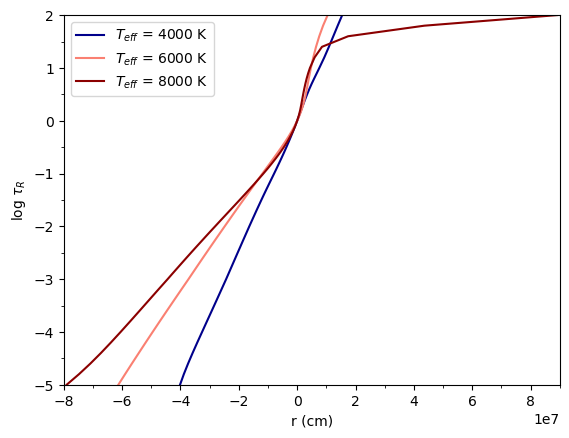

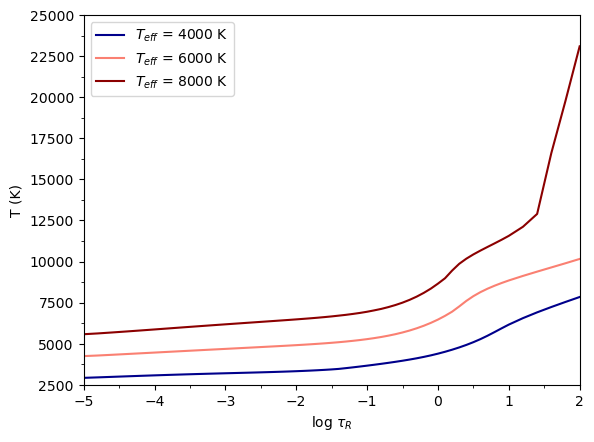

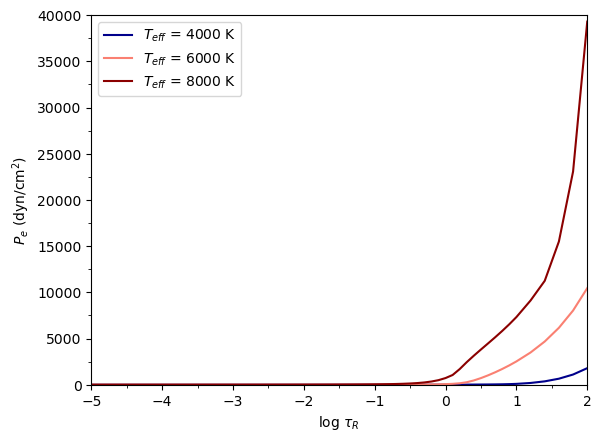

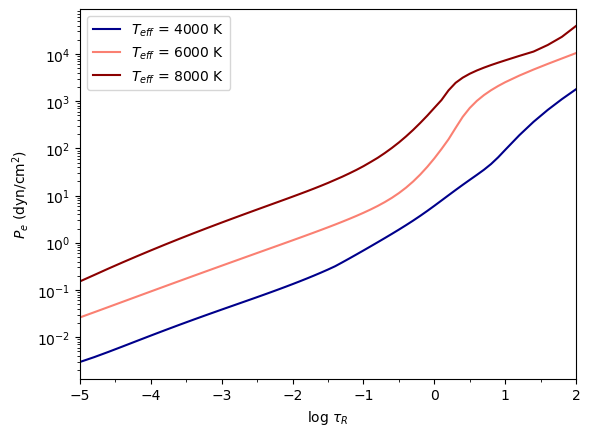

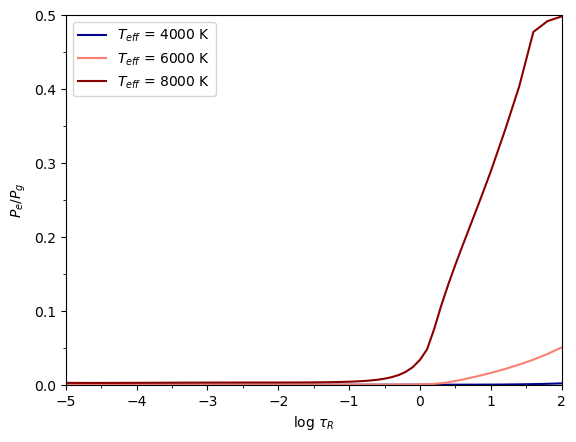

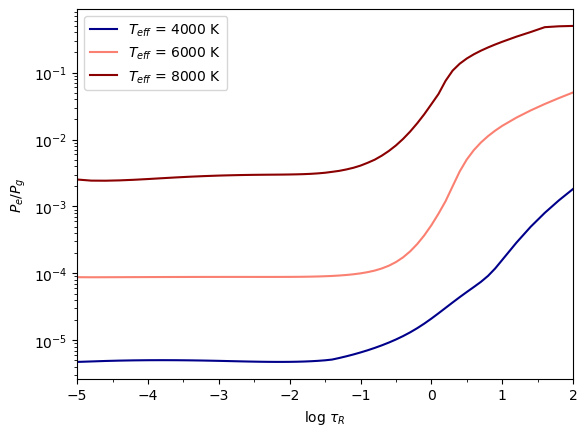

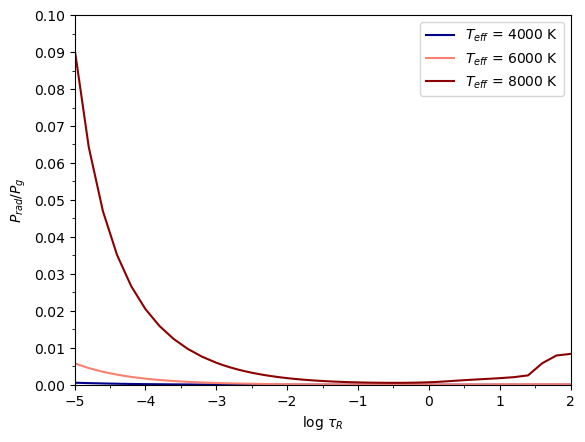

2.9643288185597425e-06 3.3528558379453015e-05 0.0005102521728485738 0.09098967497759039


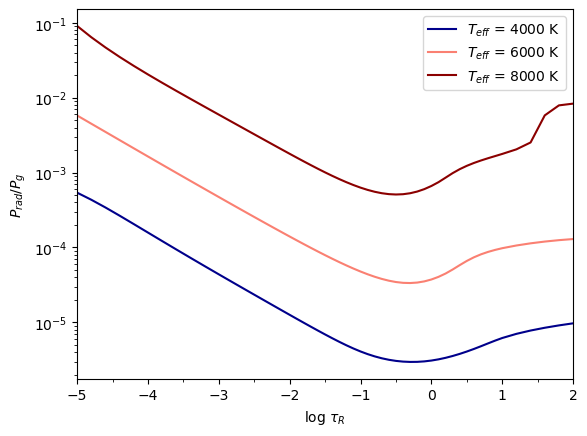

In [28]:
plt.figure(0)
plt.plot(r_t4, tau_r_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(r_t6, tau_r_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(r_t8, tau_r_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.xlabel('r (cm)')
plt.ylabel(r'log $\tau_{R}$')
plt.xlim(-8e7,9e7)
plt.ylim(-5,2)
plt.xticks(np.arange(-8e7,1e8,2e7))
plt.xticks(ticks=np.arange(-8e7,1e8,1e7),minor=True)
plt.yticks(np.arange(-5,2.5,0.5),minor=True)
plt.legend()
plt.show()
# print(min(r_t4),min(r_t6),min(r_t8))

plt.figure(1)
plt.plot(tau_r_t4, T_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, T_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, T_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('T (K)')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
plt.ylim(2500,25000)
plt.yticks(np.arange(2500,25000,1250),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
plt.legend()
plt.show()
# print(max(T_t4),max(T_t6),max(T_t8))

plt.figure(2)
plt.plot(tau_r_t4, P_e_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_e_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_e_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_e$ (dyn/cm$^2$)')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
plt.ylim(0,40000)
plt.yticks(np.arange(0,40000,2500),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
# plt.yscale('log')
plt.legend(loc='upper left')
plt.show()
# print(min(P_e_t4),min(P_e_t6),min(P_e_t8),max(P_e_t8))

plt.figure(3)
plt.plot(tau_r_t4, P_e_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_e_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_e_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_e$ (dyn/cm$^2$)')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
# plt.ylim(0,40000)
# plt.yticks(np.arange(0,40000,2500),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

plt.figure(4)
plt.plot(tau_r_t4, P_e_t4/P_g_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_e_t6/P_g_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_e_t8/P_g_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_e$/$P_g$')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
plt.ylim(0,0.5)
plt.yticks(np.arange(0,0.5,0.05),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
# plt.yscale('log')
plt.legend(loc='upper left')
plt.show()
# print(min(P_e_t4/P_g_t4),min(P_e_t6/P_g_t6),min(P_e_t8/P_g_t8),max(P_e_t8/P_g_t8))

plt.figure(5)
plt.plot(tau_r_t4, P_e_t4/P_g_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_e_t6/P_g_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_e_t8/P_g_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_e$/$P_g$')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
# plt.ylim(0,0.5)
# plt.yticks(np.arange(0,0.5,0.05),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

plt.figure(6)
plt.plot(tau_r_t4, P_rad_t4/P_g_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_rad_t6/P_g_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_rad_t8/P_g_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_{rad}$/$P_g$')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
plt.ylim(0,0.1)
plt.yticks(np.arange(0,0.11,0.01))
plt.yticks(np.arange(0,0.1,0.005),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
# plt.yscale('log')
plt.legend()
plt.show()
print(min(P_rad_t4/P_g_t4),min(P_rad_t6/P_g_t6),min(P_rad_t8/P_g_t8),max(P_rad_t8/P_g_t8))

plt.figure(7)
plt.plot(tau_r_t4, P_rad_t4/P_g_t4, c='darkblue', label='$T_{eff}$ = 4000 K')
plt.plot(tau_r_t6, P_rad_t6/P_g_t6, c='salmon', label='$T_{eff}$ = 6000 K')
plt.plot(tau_r_t8, P_rad_t8/P_g_t8, c='darkred', label='$T_{eff}$ = 8000 K')
plt.ylabel('$P_{rad}$/$P_g$')
plt.xlabel(r'log $\tau_{R}$')
plt.xlim(-5,2)
# plt.ylim(0,0.1)
# plt.yticks(np.arange(0,0.11,0.01))
# plt.yticks(np.arange(0,0.1,0.005),minor=True)
plt.xticks(np.arange(-5,2.5,0.5),minor=True)
plt.yscale('log')
plt.legend()
plt.show()

Definimos como funciones las expresiones para la densidad electrónica, la ecuación de Saha, la ec de Boltzmann, la fórmula de Rydberg (cantos ionización)

In [13]:
# # Cálculo población electrónica
# def pob_e_libres(P_e, T):
#     # Pe debe estar en erg/cm-¿?
#     return P_e/(k_B*T)

# # Ec Saha
# def Saha(j,T,Ne):
#     # Requiere introducir anteriormente la constante de Boltzmann
#     if j == -1: # H-/HI
#             U = 1/2
#             # energía ionización H-
#             x = 0.755 *1.602e-12 #erg
#     if j == 0: # HI/p(HII)
#             U = 2/1
#             x = 13.6 *1.602e-12  #erg
#     return 2.07e-16*Ne*U*T**(-3/2)*np.exp(x/(k_B*T))

# # Ec Boltzmann
# def Boltzmann(i,T):
#     U = 2
#     if i == 1:
#          x = 0 *1.602e-12 #erg
#     if i == 2:
#          x = 10.2 *1.602e-12 #erg
#     if i == 3:
#          x = 12.09 * 1.602e-12 #erg
#     g = 2*i**2
#     return g/U*np.exp(-x/(k_B*T))

# # Fórmula de Rydberg
# def Rydberg(n,m):
#     # n,m pueden tomar el valor np.inf
#     term = R_Rydb * (1/n**2 - 1/m**2)
#     return 1/term

# Modelo T=6000 K

## Cálculo de poblaciones

In [29]:
taus = [1,10]
i=0
print('CÁLCULO DE POBLACIONES\n')
for tau in taus:
    Ne = pob_e_libres(P_e_t6[np.where(tau_r_t6 == np.log10(tau))],T_t6[np.where(tau_r_t6 == np.log10(tau))])[0]

    NHmen_NH1 = Saha(-1,T_t6[np.where(tau_r_t6 == np.log10(tau))],Ne)[0]
    NH1_NH2 = Saha(0,T_t6[np.where(tau_r_t6 == np.log10(tau))],Ne)[0]

    A = np.array([[1, -NHmen_NH1, 0], [0, 1, -NH1_NH2], [-1, 0, 1]])
    B = np.array([0, 0, Ne])
    X = np.linalg.solve(A,B)
    NHmen, NHI, NHII = X

    # n1_HI = Boltzmann(1,T_t6[np.where(tau_r_t6 == np.log10(tau))])[0] *NHI
    n2_HI = Boltzmann(2,T_t6[np.where(tau_r_t6 == np.log10(tau))])[0] *NHI
    n3_HI = Boltzmann(3,T_t6[np.where(tau_r_t6 == np.log10(tau))])[0] *NHI
    n1_HI = NHI - (n2_HI +  n3_HI)

    if tau==1:
      Ne_t6_tau1 = Ne
      P_e_t6_tau1 = P_e_t6[np.where(tau_r_t6 == np.log10(tau))]
      T_t6_tau1 = T_t6[np.where(tau_r_t6 == np.log10(tau))]
      NHmen_NH1_tau1 = NHmen_NH1
      NH1_NH2_tau1 = NH1_NH2
      NHmen_t6_tau1 = NHmen
      NHI_t6_tau1 = NHI
      NHII_t6_tau1 = NHII
      n1_HI_t6_tau1 = n1_HI
      n2_HI_t6_tau1 = n2_HI
      n3_HI_t6_tau1 = n3_HI
    elif tau==10:
      Ne_t6_tau10 = Ne
    i =+ 1

    print('#####################################')
    print('tau_Rosseland =', tau)
    print('#########  ##############  ##########')
    print('H-: {:0.4e}'.format(NHmen))
    print('HI: {:0.4e}'.format(NHI))
    print('HII: {:0.4e}'.format(NHII))
    print('e: {:0.4e}'.format(Ne))
    print('HI (n=1): {:0.4e}'.format(n1_HI))
    print('HI (n=2): {:0.4e}'.format(n2_HI))
    print('HI (n=3): {:0.4e}'.format(n3_HI))

CÁLCULO DE POBLACIONES

#####################################
tau_Rosseland = 1
#########  ##############  ##########
H-: 7.9673e+09
HI: 1.5006e+17
HII: 6.8800e+13
e: 6.8792e+13
HI (n=1): 1.5006e+17
HI (n=2): 6.7345e+09
HI (n=3): 5.0979e+08
#####################################
tau_Rosseland = 10
#########  ##############  ##########
H-: 8.1783e+10
HI: 1.1832e+17
HII: 2.0644e+15
e: 2.0643e+15
HI (n=1): 1.1832e+17
HI (n=2): 7.3302e+11
HI (n=3): 1.3827e+11


## Cálculo de opacidades

Más funciones

In [ ]:
# # Opacidad scattering electrones
# def k_e(Ne):
#     sigma_e = 6.25e-25
#     return sigma_e*Ne

# # Opacidad H- para procesos f-f
# def k_ff_Hmen(T,l_cm,Pe,N_HI):
#     l = l_cm *1e8 # Armstrongs
#     theta = 5040/T
#     f0 = -2.2763 - 1.6850*np.log10(l) + 0.76661*np.log10(l)**2 - 0.053346*np.log10(l)**3
#     f1 = 15.2827 - 9.2846*np.log10(l) + 1.99381*np.log10(l)**2 - 0.142631*np.log10(l)**3
#     f2 = -197.789 + 190.266*np.log10(l) - 67.9775*np.log10(l)**2 + 10.6913*np.log10(l)**3 - 0.625151*np.log10(l)**4
#     sigma = 1e-26*10**(f0 + f1*np.log10(theta) + f2*np.log10(theta)**2)
#     return Pe*sigma*N_HI

# # Opacidad H- para procesos b-f
# def k_bf_Hmen(l_cm,Ni,nu,T):
#     kappas = []
#     l = l_cm*1e8 # A
#     a_0 = 1.99654
#     a_1 = -1.18267e-5
#     a_2 = 2.64243e-6
#     a_3 = -4.40524e-10
#     a_4 = 3.23992e-14
#     a_5 = -1.39568e-18
#     a_6 = 2.78701e-23
#     for i in range(len(nu)):
#         if nu[i] >= c/l0:
#             sigma = (a_0 + a_1*l[i] + a_2*l[i]**2 + a_3*l[i]**3 + a_4*l[i]**4 + a_5*l[i]**5 + a_6*l[i]**6)*1e-18 #cm**2
#             k = sigma*Ni*(1 - np.exp(-h*nu[i]/(k_B*T)))
#         else:
#             k = 0
#         kappas.append(k)
#     return np.array(kappas)

# # Opacidad para procesos f-f
# def k_ff(l,T,nu,Ne,Nk):
#     g_ff = 1 + (0.3456/(l*R_Rydb)**(1/3))*(l*k_B*T/(h*c) + 1/2)
#     sigma = 3.7e8/(T**(1/2)*nu**3)*g_ff
#     return sigma*Ne*Nk*(1 - np.exp(-h*nu/(k_B*T)))

# # Opacidad para procesos b-f
# def k_bf(n,l,nu,Ni,T):
#     kappas = []
#     for i in range(len(nu)):
#         g_bf = 1 - 0.3456/(l[i]*R_Rydb)**1/3 *(l[i]*R_Rydb/n**2 - 1/2)
#         sigma = 2.815e29/(n**5*nu[i]**3)*g_bf
#         if (n==1 and nu[i] >= c/l1):
#             k = sigma*Ni*(1 - np.exp(-h*nu[i]/(k_B*T)))
#         elif (n==2 and nu[i] >= c/l2):
#             k = sigma*Ni*(1 - np.exp(-h*nu[i]/(k_B*T)))
#         elif (n==3 and nu[i] >= c/l3):
#             k = sigma*Ni*(1 - np.exp(-h*nu[i]/(k_B*T)))
#         else:
#             k = 0
#         kappas.append(k)
#     return np.array(kappas)

# # Absorción lineas
# # def k_linea(l_cm,nu):
# #   for i in range(len(nu)):
# #     if l_cm[i] == Ly_alpha:
# #       n, m = 1, 2
# #       g_bb = 0.717 # Ref en overleaf: BakerMezel1938. Tabla 2
# #       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
# #       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
# #       sigma = np.pi * e**2 * f / (m_e * c)
# #       k = sigma * (n - g_n * m / g_m)
# #     elif l_cm[i] == Ly_beta:
# #       n, m = 1, 3
# #       g_bb = 0.765 # Ref en overleaf: BakerMezel1938. Tabla 2
# #       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
# #       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
# #       sigma = np.pi * e**2 * f / (m_e * c)
# #       k = sigma * (n - g_n * m / g_m)
# #     elif l_cm[i] == H_alpha:
# #       n, m = 2, 3
# #       g_bb = 0.869 - 3/m**3 # Expresión de los apuntes para serie de Balmer
# #       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
# #       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
# #       sigma = np.pi * e**2 * f / (m_e * c)
# #       k = sigma * (n - g_n * m / g_m)
# #     else:
# #       k = 0
# #     return k
# def k_linea(n,m,n_n,n_m):
#   if n == 1 and m == 2:
#       g_bb = 0.717 # Ref en overleaf: BakerMezel1938. Tabla 2
#       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
#       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
#       sigma = np.pi * e**2 * f / (m_e * c)
#       k = sigma * (n_n - g_n * n_m / g_m)
#   elif n == 1 and m == 3:
#       g_bb = 0.765 # Ref en overleaf: BakerMezel1938. Tabla 2
#       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
#       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
#       sigma = np.pi * e**2 * f / (m_e * c)
#       k = sigma * (n_n - g_n * n_m / g_m)
#   elif n == 2 and m == 3:
#       g_bb = 0.869 - 3/m**3 # Expresión de los apuntes para serie de Balmer
#       g_n, g_m = 2*n**2, 2*m**2 # Expresión para el hidrógeno
#       f = 2**5 * g_bb * (1/n**2 - 1/m**2)**(-3) / (3**(3/2) * np.pi * n**5 * m**3)
#       sigma = np.pi * e**2 * f / (m_e * c)
#       k = sigma * (n_n - g_n * n_m / g_m)
#   return k

Cálculo opacidades en longitudes de onda en torno a los cantos de ionización

In [30]:
import warnings
warnings.simplefilter('ignore')

# Cantos de ionización
l0 = h*c/(0.755 *1.602e-12)   #Canto ionización H-. 16423.55878 A
l1 = (R_Rydb/1**2)**-1    #Canto para ionización de HI, n=1. 911.74325 A
l2 = (R_Rydb/2**2)**-1  #Canto para ionización de HI, n=2. 3646.97301 A
l3 = (R_Rydb/3**2)**-1  #Canto para ionización de HI, n=3. 8205.689278 A
l = np.array([l0 - 1e-4*l1, l0 + 1e-4*l1, l1 - 1e-4*l1, l1 + 1e-4*l1, l2 - 1e-4*l2, l2 + 1e-4*l2, l3 - 1e-4*l3, l3 + 1e-4*l3])

ke_t6_tau1_cantos = k_e(Ne_t6_tau1)
k_ff_Hmen_t6_tau1_cantos = k_ff_Hmen(T_t6_tau1,l,P_e_t6_tau1,NHI_t6_tau1)
k_ff_HI_t6_tau1_cantos = k_ff(l,T_t6_tau1,c/l,Ne_t6_tau1,NHII_t6_tau1)
k_bf_Hmen_t6_tau1_cantos = k_bf_Hmen(l,NHmen_t6_tau1,c/l,T_t6_tau1, l0)
k_bf_HI_n1_t6_tau1_cantos = k_bf(1,l,c/l,n1_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n2_t6_tau1_cantos = k_bf(2,l,c/l,n2_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n3_t6_tau1_cantos = k_bf(3,l,c/l,n3_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_tot_t6_tau1_cantos = ke_t6_tau1_cantos + k_ff_Hmen_t6_tau1_cantos + k_ff_HI_t6_tau1_cantos + k_bf_Hmen_t6_tau1_cantos + k_bf_HI_n1_t6_tau1_cantos + k_bf_HI_n2_t6_tau1_cantos + k_bf_HI_n3_t6_tau1_cantos

for i in range(len(l)):
    print('#####################################')
    print('lambda = {:0.4e} A'.format(l[i]*1e8))
    print('################################')
    print('Total: {:0.4e}'.format(float(k_tot_t6_tau1_cantos[i])))
    print('e: {:0.4e}'.format(ke_t6_tau1_cantos))
    print('ff (H-): {:0.4e}'.format(k_ff_Hmen_t6_tau1_cantos[i]))
    print('ff (HI): {:0.4e}'.format(k_ff_HI_t6_tau1_cantos[i]))
    print('bf (H-,n=1): {:0.4e}'.format(float(k_bf_Hmen_t6_tau1_cantos[i])))
    print('bf (HI,n=1): {:0.4e}'.format(float(k_bf_HI_n1_t6_tau1_cantos[i])))
    print('bf (HI,n=2): {:0.4e}'.format(float(k_bf_HI_n2_t6_tau1_cantos[i])))
    print('bf (HI,n=3): {:0.4e}'.format(float(k_bf_HI_n3_t6_tau1_cantos[i])))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [31]:
# (R_Rydb/4**2)**(-1) * 1e8

Cálculo opacidades de las líneas del H (solo frecuencia central)

In [11]:
Ly_alpha = Rydberg(1,2) # 1.215658e-5 cm
Ly_beta = Rydberg(1,3) # 1.025711e-5 cm
H_alpha = Rydberg(2,3) # 6.564551e-5 cm
# print(Ly_alpha,Ly_beta,H_alpha)

k_Ly_alpha_t6_tau1 = k_linea(1,2,n1_HI_t6_tau1,n2_HI_t6_tau1)
k_Ly_beta_t6_tau1 = k_linea(1,3,n1_HI_t6_tau1,n3_HI_t6_tau1)
k_H_alpha_t6_tau1 = k_linea(2,3,n2_HI_t6_tau1,n3_HI_t6_tau1)

print('Opacidad de la línea de Ly-alpha ({:4.8} A): {:0.4e}'.format(Ly_alpha*1e8, k_Ly_alpha_t6_tau1))
print('Opacidad de la línea de Ly-beta ({:4.8} A): {:0.4e}'.format(Ly_beta*1e8, k_Ly_beta_t6_tau1))
print('Opacidad de la línea de H-alpha ({:4.8} A): {:0.4e}'.format(H_alpha*1e8, k_H_alpha_t6_tau1))

Opacidad de la línea de Ly-alpha (1215.6577 A): 1.6586e+15
Opacidad de la línea de Ly-beta (1025.7112 A): 3.1495e+14
Opacidad de la línea de H-alpha (6564.5514 A): 1.1085e+08


## Opacidades en el rango de longitudes de onda 800-20 000 A

Opacidad en los cantos ampliado al rango de long onda

In [ ]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

k_ff_Hmen_t6_tau1_cantos_plot = k_ff_Hmen(T_t6_tau1,l,P_e_t6_tau1,NHI_t6_tau1)
k_ff_HI_t6_tau1_cantos_plot = k_ff(l,T_t6_tau1,c/l,Ne_t6_tau1,NHII_t6_tau1)
k_bf_Hmen_t6_tau1_cantos_plot = k_bf_Hmen(l,NHmen_t6_tau1,c/l,T_t6_tau1, l0)
k_bf_HI_n1_t6_tau1_cantos_plot = k_bf(1,l,c/l,n1_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n2_t6_tau1_cantos_plot = k_bf(2,l,c/l,n2_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n3_t6_tau1_cantos_plot = k_bf(3,l,c/l,n3_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_tot_t6_tau1_cantos_plot = ke_t6_tau1_cantos + k_ff_Hmen_t6_tau1_cantos_plot + k_ff_HI_t6_tau1_cantos_plot + k_bf_Hmen_t6_tau1_cantos_plot + k_bf_HI_n1_t6_tau1_cantos_plot + k_bf_HI_n2_t6_tau1_cantos_plot + k_bf_HI_n3_t6_tau1_cantos_plot


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100000,) + inhomogeneous part.

In [ ]:
# plt.plot(l_A, k_bf_Hmen_t6_tau1_cantos_plot)

Representación de la opacidad en el rango de long de onda

In [13]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

# Suma de las contribuciones del continuo y de las líneas
ind_Ly_alpha = np.where((l > Ly_alpha - 1e-9) & (l < Ly_alpha + 1e-9))[0][0]
ind_Ly_beta = np.where((l > Ly_beta - 1e-9) & (l < Ly_beta + 1e-9))[0][0]
ind_H_alpha = np.where((l > H_alpha - 1e-9) & (l < H_alpha + 1e-9))[0][0]
# for ind in np.arange(0,len(l)):
#   if ind == ind_Ly_alpha:
#     k_Lineas_t6_tau1 = k_Ly_alpha_t6_tau1
#   elif ind == ind_Ly_beta:
#     k_Lineas_t6_tau1 = k_Ly_beta_t6_tau1
#   elif ind == ind_H_alpha:
#     k_Lineas_t6_tau1 = k_H_alpha_t6_tau1
#   else:
#     k_Lineas_t6_tau1 = 0
#   k_tot_t6_tau1 = k_tot_t6_tau1_cantos + k_Lineas_t6_tau1
k_tot_t6_tau1 = k_tot_t6_tau1_cantos_plot
k_tot_t6_tau1[ind_Ly_alpha] = k_tot_t6_tau1[ind_Ly_alpha] + k_Ly_alpha_t6_tau1
k_tot_t6_tau1[ind_Ly_beta] = k_tot_t6_tau1[ind_Ly_beta] + k_Ly_beta_t6_tau1
k_tot_t6_tau1[ind_H_alpha] = k_tot_t6_tau1[ind_H_alpha] + k_H_alpha_t6_tau1

# Representación gráfica opacidad frente a long onda
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0)  # adjust space between axes
fig.set_size_inches((9, 4.8))
# Plots
ax1.plot(l_A, k_tot_t6_tau1, c='k')
ax2.plot(l_A, k_tot_t6_tau1, c='k')
ax2.axhline(1e-6, ls='-.', c='grey')
ax1.axvline(l1*1e8, ls=':', lw=1, c='k')
ax2.axvline(l1*1e8, ls=':', lw=1, c='k', label='Cantos de ionización')
ax1.axvline(l0*1e8, ls=':', lw=1, c='k')
ax2.axvline(l0*1e8, ls=':', lw=1, c='k')
ax1.axvline(l2*1e8, ls=':', lw=1, c='k')
ax2.axvline(l2*1e8, ls=':', lw=1, c='k')
ax1.axvline(l3*1e8, ls=':', lw=1, c='k')
ax2.axvline(l3*1e8, ls=':', lw=1, c='k')
ax1.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k', label='Líneas del hidrógeno')
ax1.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax1.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
# Límites ejes
ax1.set_xlim(250, 21000)
ax1.set_ylim(0.75e-1,1e18)
ax2.set_xlim(250, 21000)
ax2.set_ylim(1e-8,1e-6)
# Escala log en eje y
ax1.set_yscale('log')
ax2.set_yscale('log')
# Ajustar cuadro gráficos para juntarlos
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# Ajustar ticks de los ejes
ax1.tick_params(labelbottom=False)
ax1.set_yticks(np.array([1, 1e4, 1e8, 1e12, 1e16]), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax1.set_yticklabels('',minor=True)
ax2.tick_params(labeltop=False)
ax2.set_xticks(np.arange(1250, 21250, 1250), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax2.set_xticklabels('',minor=True)
# Etiquetas de los ejes
ax1.set_ylabel('$\kappa$ (cm$^{-1}$)', fontsize=14)
ax2.set_xlabel('$\lambda$ [Å]', fontsize=14)
ax1.yaxis.set_label_coords(-0.065, 0)
# Leyendas
ax2.legend(bbox_to_anchor=(0.98, 1.94),fontsize=12) #0.7874136


# plt.plot(l_A, k_tot_t6_tau1, c='k')
# # plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('$\lambda$ [Å]')
# plt.ylabel('$\kappa$ (cm$^{-1}$)')
# plt.xlim(250, 20500)
# plt.ylim(1e-8,1e-6)
# plt.xticks(ticks=(np.arange(1000, 21001, 5000)))
# plt.xticks(ticks=(np.arange(1000, 21000, 2500)),minor=True)
# # plt.show()

NameError: name 'k_tot_t6_tau1_cantos_plot' is not defined

# Modelo T=8000 K

## Calculo de poblaciones

In [14]:
taus = [1,10]
i=0
print('CÁLCULO DE POBLACIONES\n')
for tau in taus:
    Ne_t8 = pob_e_libres(P_e_t8[np.where(tau_r_t8 == np.log10(tau))],T_t8[np.where(tau_r_t8 == np.log10(tau))])[0]

    NHmen_NH1_t8 = Saha(-1,T_t8[np.where(tau_r_t8 == np.log10(tau))],Ne_t8)[0]
    NH1_NH2_t8 = Saha(0,T_t8[np.where(tau_r_t8 == np.log10(tau))],Ne_t8)[0]

    A_t8 = np.array([[1, -NHmen_NH1_t8, 0], [0, 1, -NH1_NH2_t8], [-1, 0, 1]])
    B_t8 = np.array([0, 0, Ne_t8])
    X_t8 = np.linalg.solve(A_t8,B_t8)
    NHmen_t8, NHI_t8, NHII_t8 = X_t8

    # n1_HI_t8 = Boltzmann(1,T_t8[np.where(tau_r_t8 == np.log10(tau))])[0] *NHI_t8
    n2_HI_t8 = Boltzmann(2,T_t8[np.where(tau_r_t8 == np.log10(tau))])[0] *NHI_t8
    n3_HI_t8 = Boltzmann(3,T_t8[np.where(tau_r_t8 == np.log10(tau))])[0] *NHI_t8
    n1_HI_t8 = NHI_t8 - (n2_HI_t8 +  n3_HI_t8)

    if tau==1:
      Ne_t8_tau1 = Ne_t8
      P_e_t8_tau1 = P_e_t8[np.where(tau_r_t8 == np.log10(tau))]
      T_t8_tau1 = T_t8[np.where(tau_r_t8 == np.log10(tau))]
      NHmen_NH1_t8_tau1 = NHmen_NH1_t8
      NH1_NH2_t8_tau1 = NH1_NH2_t8
      NHmen_t8_tau1 = NHmen_t8
      NHI_t8_tau1 = NHI_t8
      NHII_t8_tau1 = NHII_t8
      n1_HI_t8_tau1 = n1_HI_t8
      n2_HI_t8_tau1 = n2_HI_t8
      n3_HI_t8_tau1 = n3_HI_t8
    elif tau==10:
      Ne_t8_tau10 = Ne_t8
    i =+ 1

    print(20*'#')
    print('tau_Rosseland =', tau)
    print('#########  ##############  ##########')
    print('H-: {:0.4e}'.format(NHmen_t8))
    print('HI: {:0.4e}'.format(NHI_t8))
    print('HII: {:0.4e}'.format(NHII_t8))
    print('e: {:0.4e}'.format(Ne_t8))
    print('HI (n=1): {:0.4e}'.format(n1_HI_t8))
    print('HI (n=2): {:0.4e}'.format(n2_HI_t8))
    print('HI (n=3): {:0.4e}'.format(n3_HI_t8))

CÁLCULO DE POBLACIONES

####################
tau_Rosseland = 1
#########  ##############  ##########
H-: 3.3357e+09
HI: 1.5604e+16
HII: 6.0415e+14
e: 6.0415e+14
HI (n=1): 1.5604e+16
HI (n=2): 7.1696e+10
HI (n=3): 1.2796e+10
####################
tau_Rosseland = 10
#########  ##############  ##########
H-: 4.8207e+09
HI: 5.9198e+15
HII: 4.5858e+15
e: 4.5858e+15
HI (n=1): 5.9186e+15
HI (n=2): 8.4931e+11
HI (n=3): 2.8679e+11


## Cálculo de opacidades

Cálculo opacidades en longitudes de onda en torno a los cantos de ionización

In [ ]:
import warnings
warnings.simplefilter('ignore')

# Cantos de ionización
l0 = h*c/(0.755 *1.602e-12)   #Canto ionización H-. 16423.55878 A
l1 = (R_Rydb/1**2)**-1    #Canto para ionización de HI, n=1. 911.74325 A
l2 = (R_Rydb/2**2)**-1  #Canto para ionización de HI, n=2. 3646.97301 A
l3 = (R_Rydb/3**2)**-1  #Canto para ionización de HI, n=3. 8205.689278 A
l = np.array([l0 - 1e-4*l1, l0 + 1e-4*l1, l1 - 1e-4*l1, l1 + 1e-4*l1, l2 - 1e-4*l2, l2 + 1e-4*l2, l3 - 1e-4*l3, l3 + 1e-4*l3])

ke_t8_tau1_cantos = k_e(Ne_t8_tau1)
k_ff_Hmen_t8_tau1_cantos = k_ff_Hmen(T_t8_tau1,l,P_e_t8_tau1,NHI_t8_tau1)
k_ff_HI_t8_tau1_cantos = k_ff(l,T_t8_tau1,c/l,Ne_t8_tau1,NHII_t8_tau1)
k_bf_Hmen_t8_tau1_cantos = k_bf_Hmen(l,NHmen_t8_tau1,c/l,T_t8_tau1, l0)
k_bf_HI_n1_t8_tau1_cantos = k_bf(1,l,c/l,n1_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n2_t8_tau1_cantos = k_bf(2,l,c/l,n2_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n3_t8_tau1_cantos = k_bf(3,l,c/l,n3_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_tot_t8_tau1_cantos = ke_t8_tau1_cantos + k_ff_Hmen_t8_tau1_cantos + k_ff_HI_t8_tau1_cantos + k_bf_Hmen_t8_tau1_cantos + k_bf_HI_n1_t8_tau1_cantos + k_bf_HI_n2_t8_tau1_cantos + k_bf_HI_n3_t8_tau1_cantos

for i in range(len(l)):
    print('#####################################')
    print('lambda = {:0.4e} A'.format(l[i]*1e8))
    print('################################')
    print('Total: {:0.4e}'.format(float(k_tot_t8_tau1_cantos[i])))
    print('e: {:0.4e}'.format(ke_t8_tau1_cantos))
    print('ff (H-): {:0.4e}'.format(k_ff_Hmen_t8_tau1_cantos[i]))
    print('ff (HI): {:0.4e}'.format(k_ff_HI_t8_tau1_cantos[i]))
    print('bf (H-,n=1): {:0.4e}'.format(float(k_bf_Hmen_t8_tau1_cantos[i])))
    print('bf (HI,n=1): {:0.4e}'.format(float(k_bf_HI_n1_t8_tau1_cantos[i])))
    print('bf (HI,n=2): {:0.4e}'.format(float(k_bf_HI_n2_t8_tau1_cantos[i])))
    print('bf (HI,n=3): {:0.4e}'.format(float(k_bf_HI_n3_t8_tau1_cantos[i])))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

Cálculo opacidades de las líneas del H (solo frecuencia central)

In [ ]:
Ly_alpha = Rydberg(1,2) # 1.215658e-5 cm
Ly_beta = Rydberg(1,3) # 1.025711e-5 cm
H_alpha = Rydberg(2,3) # 6.564551e-5 cm
# print(Ly_alpha,Ly_beta,H_alpha)

k_Ly_alpha_t8_tau1 = k_linea(1,2,n1_HI_t8_tau1,n2_HI_t8_tau1)
k_Ly_beta_t8_tau1 = k_linea(1,3,n1_HI_t8_tau1,n3_HI_t8_tau1)
k_H_alpha_t8_tau1 = k_linea(2,3,n2_HI_t8_tau1,n3_HI_t8_tau1)

print('Opacidad de la línea de Ly-alpha ({:4.8} A): {:0.4e}'.format(Ly_alpha*1e8, k_Ly_alpha_t8_tau1))
print('Opacidad de la línea de Ly-beta ({:4.8} A): {:0.4e}'.format(Ly_beta*1e8, k_Ly_beta_t8_tau1))
print('Opacidad de la línea de H-alpha ({:4.8} A): {:0.4e}'.format(H_alpha*1e8, k_H_alpha_t8_tau1))

Opacidad de la línea de Ly-alpha (1215.6577 A): 1.7246e+14
Opacidad de la línea de Ly-beta (1025.7112 A): 3.2750e+13
Opacidad de la línea de H-alpha (6564.5514 A): 1.1244e+09


## Opacidades en el rango de longitudes de onda 800-20 000 A

Opacidad en los cantos ampliado al rango de long onda

In [ ]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

k_ff_Hmen_t8_tau1_cantos_plot = k_ff_Hmen(T_t8_tau1,l,P_e_t8_tau1,NHI_t8_tau1)
k_ff_HI_t8_tau1_cantos_plot = k_ff(l,T_t8_tau1,c/l,Ne_t8_tau1,NHII_t8_tau1)
k_bf_Hmen_t8_tau1_cantos_plot = k_bf_Hmen(l,NHmen_t8_tau1,c/l,T_t8_tau1, l0)
k_bf_HI_n1_t8_tau1_cantos_plot = k_bf(1,l,c/l,n1_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n2_t8_tau1_cantos_plot = k_bf(2,l,c/l,n2_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n3_t8_tau1_cantos_plot = k_bf(3,l,c/l,n3_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_tot_t8_tau1_cantos_plot = ke_t8_tau1_cantos + k_ff_Hmen_t8_tau1_cantos_plot + k_ff_HI_t8_tau1_cantos_plot + k_bf_Hmen_t8_tau1_cantos_plot + k_bf_HI_n1_t8_tau1_cantos_plot + k_bf_HI_n2_t8_tau1_cantos_plot + k_bf_HI_n3_t8_tau1_cantos_plot


Representación de la opacidad en el rango de long de onda

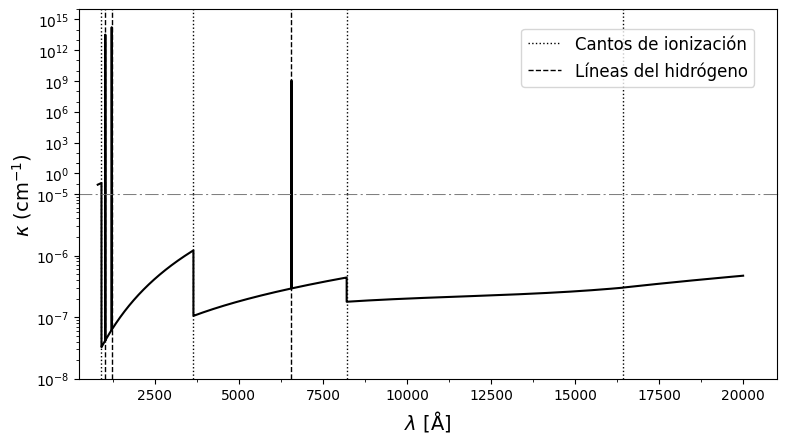

In [ ]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

# Suma de las contribuciones del continuo y de las líneas
ind_Ly_alpha = np.where((l > Ly_alpha - 1e-9) & (l < Ly_alpha + 1e-9))[0][0]
ind_Ly_beta = np.where((l > Ly_beta - 1e-9) & (l < Ly_beta + 1e-9))[0][0]
ind_H_alpha = np.where((l > H_alpha - 1e-9) & (l < H_alpha + 1e-9))[0][0]
# for ind in np.arange(0,len(l)):
#   if ind == ind_Ly_alpha:
#     k_Lineas_t6_tau1 = k_Ly_alpha_t6_tau1
#   elif ind == ind_Ly_beta:
#     k_Lineas_t6_tau1 = k_Ly_beta_t6_tau1
#   elif ind == ind_H_alpha:
#     k_Lineas_t6_tau1 = k_H_alpha_t6_tau1
#   else:
#     k_Lineas_t6_tau1 = 0
#   k_tot_t6_tau1 = k_tot_t6_tau1_cantos + k_Lineas_t6_tau1
k_tot_t8_tau1 = k_tot_t8_tau1_cantos_plot
k_tot_t8_tau1[ind_Ly_alpha] = k_tot_t8_tau1[ind_Ly_alpha] + k_Ly_alpha_t8_tau1
k_tot_t8_tau1[ind_Ly_beta] = k_tot_t8_tau1[ind_Ly_beta] + k_Ly_beta_t8_tau1
k_tot_t8_tau1[ind_H_alpha] = k_tot_t8_tau1[ind_H_alpha] + k_H_alpha_t8_tau1

# Representación gráfica opacidad frente a long onda
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0)  # adjust space between axes
fig.set_size_inches((9, 4.8))
# Plots
ax1.plot(l_A, k_tot_t8_tau1, c='k')
ax2.plot(l_A, k_tot_t8_tau1, c='k')
ax2.axhline(1e-5, ls='-.', c='grey')
ax1.axvline(l1*1e8, ls=':', lw=1, c='k')
ax2.axvline(l1*1e8, ls=':', lw=1, c='k', label='Cantos de ionización')
ax1.axvline(l0*1e8, ls=':', lw=1, c='k')
ax2.axvline(l0*1e8, ls=':', lw=1, c='k')
ax1.axvline(l2*1e8, ls=':', lw=1, c='k')
ax2.axvline(l2*1e8, ls=':', lw=1, c='k')
ax1.axvline(l3*1e8, ls=':', lw=1, c='k')
ax2.axvline(l3*1e8, ls=':', lw=1, c='k')
ax1.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k', label='Líneas del hidrógeno')
ax1.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax1.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
# Límites ejes
ax1.set_xlim(250, 21000)
ax1.set_ylim(1e-2,1e16)
ax2.set_xlim(250, 21000)
ax2.set_ylim(1e-8,1e-5)
# Escala log en eje y
ax1.set_yscale('log')
ax2.set_yscale('log')
# Ajustar cuadro gráficos para juntarlos
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# Ajustar ticks de los ejes
ax1.tick_params(labelbottom=False)
ax1.set_yticks(np.array([1, 1e3, 1e6, 1e9, 1e12, 1e15]))
ax1.set_yticks(np.array([1e-1, 10, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax1.set_yticklabels('',minor=True)
ax2.tick_params(labeltop=False)
ax2.set_xticks(np.arange(1250, 21250, 1250), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax2.set_xticklabels('',minor=True)
# Etiquetas de los ejes
ax1.set_ylabel('$\kappa$ (cm$^{-1}$)', fontsize=14)
ax2.set_xlabel('$\lambda$ [Å]', fontsize=14)
ax1.yaxis.set_label_coords(-0.065, 0)
# Leyendas
ax2.legend(bbox_to_anchor=(0.98, 1.94),fontsize=12) #0.7874136


# plt.plot(l_A, k_tot_t8_tau1, c='k')
# # plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('$\lambda$ [Å]')
# plt.ylabel('$\kappa$ (cm$^{-1}$)')
# plt.xlim(250, 20500)
# plt.ylim(1e-8,1e-6)
# plt.xticks(ticks=(np.arange(1000, 21001, 5000)))
# plt.xticks(ticks=(np.arange(1000, 21000, 2500)),minor=True)
# # plt.show()

# Comparación modelos

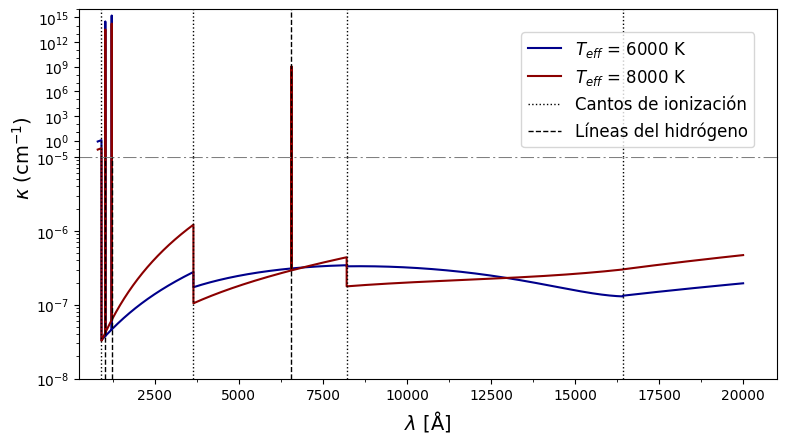

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=np.array([0.4,0.6]))
fig.subplots_adjust(hspace=0)  # adjust space between axes
fig.set_size_inches((9, 4.8))
# Plots
ax1.plot(l_A, k_tot_t6_tau1, c='darkblue')
ax2.plot(l_A, k_tot_t6_tau1, c='darkblue', label='$T_{eff}$ = 6000 K')
ax1.plot(l_A, k_tot_t8_tau1, c='darkred')
ax2.plot(l_A, k_tot_t8_tau1, c='darkred', label='$T_{eff}$ = 8000 K')
ax2.axhline(1e-5, ls='-.', c='grey')
ax1.axvline(l1*1e8, ls=':', lw=1, c='k')
ax2.axvline(l1*1e8, ls=':', lw=1, c='k', label='Cantos de ionización')
ax1.axvline(l0*1e8, ls=':', lw=1, c='k')
ax2.axvline(l0*1e8, ls=':', lw=1, c='k')
ax1.axvline(l2*1e8, ls=':', lw=1, c='k')
ax2.axvline(l2*1e8, ls=':', lw=1, c='k')
ax1.axvline(l3*1e8, ls=':', lw=1, c='k')
ax2.axvline(l3*1e8, ls=':', lw=1, c='k')
# ax1.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_alpha*1e8, ls='--', lw=1, c='k', label='Líneas del hidrógeno')
# ax1.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax2.axvline(Ly_beta*1e8, ls='--', lw=1, c='k')
ax1.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
ax2.axvline(H_alpha*1e8, ls='--', lw=1, c='k')
# Límites ejes
ax1.set_xlim(250, 21000)
ax1.set_ylim(1e-2,1e16)
ax2.set_xlim(250, 21000)
ax2.set_ylim(1e-8,1e-5)
# Escala log en eje y
ax1.set_yscale('log')
ax2.set_yscale('log')
# Ajustar cuadro gráficos para juntarlos
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# Ajustar ticks de los ejes
ax1.tick_params(labelbottom=False)
ax1.set_yticks(np.array([1, 1e3, 1e6, 1e9, 1e12, 1e15]))
ax1.set_yticks(np.array([1e-1, 10, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax1.set_yticklabels('',minor=True)
ax2.tick_params(labeltop=False)
ax2.set_xticks(np.arange(1250, 21250, 1250), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax2.set_xticklabels('',minor=True)
# Etiquetas de los ejes
ax1.set_ylabel('$\kappa$ (cm$^{-1}$)', fontsize=14)
ax2.set_xlabel('$\lambda$ [Å]', fontsize=14)
ax1.yaxis.set_label_coords(-0.065, 0)
# Leyendas
ax2.legend(bbox_to_anchor=(0.98, 1.6),fontsize=12) #0.7874136

Comparación sin líneas del hidrógeno

In [ ]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

k_ff_Hmen_t6_tau1_cantos_PRUEBA = k_ff_Hmen(T_t6_tau1,l,P_e_t6_tau1,NHI_t6_tau1)
k_ff_HI_t6_tau1_cantos_PRUEBA = k_ff(l,T_t6_tau1,c/l,Ne_t6_tau1,NHII_t6_tau1)
k_bf_Hmen_t6_tau1_cantos_PRUEBA = k_bf_Hmen(l,NHmen_t6_tau1,c/l,T_t6_tau1, l0)
k_bf_HI_n1_t6_tau1_cantos_PRUEBA = k_bf(1,l,c/l,n1_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n2_t6_tau1_cantos_PRUEBA = k_bf(2,l,c/l,n2_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_bf_HI_n3_t6_tau1_cantos_PRUEBA = k_bf(3,l,c/l,n3_HI_t6_tau1,T_t6_tau1, l1, l2, l3)
k_tot_t6_tau1_cantos_PRUEBA = ke_t6_tau1_cantos + k_ff_Hmen_t6_tau1_cantos_PRUEBA + k_ff_HI_t6_tau1_cantos_PRUEBA + k_bf_Hmen_t6_tau1_cantos_PRUEBA + k_bf_HI_n1_t6_tau1_cantos_PRUEBA + k_bf_HI_n2_t6_tau1_cantos_PRUEBA + k_bf_HI_n3_t6_tau1_cantos_PRUEBA


In [ ]:
l_A = np.linspace(800, 20_000, 100000) # A
l = l_A *1e-8    #cm

k_ff_Hmen_t8_tau1_cantos_PRUEBA = k_ff_Hmen(T_t8_tau1,l,P_e_t8_tau1,NHI_t8_tau1)
k_ff_HI_t8_tau1_cantos_PRUEBA = k_ff(l,T_t8_tau1,c/l,Ne_t8_tau1,NHII_t8_tau1)
k_bf_Hmen_t8_tau1_cantos_PRUEBA = k_bf_Hmen(l,NHmen_t8_tau1,c/l,T_t8_tau1, l0)
k_bf_HI_n1_t8_tau1_cantos_PRUEBA = k_bf(1,l,c/l,n1_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n2_t8_tau1_cantos_PRUEBA = k_bf(2,l,c/l,n2_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_bf_HI_n3_t8_tau1_cantos_PRUEBA = k_bf(3,l,c/l,n3_HI_t8_tau1,T_t8_tau1, l1, l2, l3)
k_tot_t8_tau1_cantos_PRUEBA = ke_t8_tau1_cantos + k_ff_Hmen_t8_tau1_cantos_PRUEBA + k_ff_HI_t8_tau1_cantos_PRUEBA + k_bf_Hmen_t8_tau1_cantos_PRUEBA + k_bf_HI_n1_t8_tau1_cantos_PRUEBA + k_bf_HI_n2_t8_tau1_cantos_PRUEBA + k_bf_HI_n3_t8_tau1_cantos_PRUEBA


In [ ]:
# plt.plot(l_A,k_tot_t6_tau1_cantos_PRUEBA, c='darkblue', label='T = 6000 K')
# plt.plot(l_A,k_tot_t8_tau1_cantos_PRUEBA, c='darkred', label='T = 8000 K')
# plt.axvline(l0*1e8, ls=':', lw=1, c='k')
# plt.axvline(l1*1e8, ls=':', lw=1, c='k')
# plt.axvline(l2*1e8, ls=':', lw=1, c='k')
# plt.axvline(l3*1e8, ls=':', lw=1, c='k')
# plt.yscale('log')
# plt.xlabel('$\lambda$ (Å)')
# plt.ylabel('$\kappa$ (cm$^-1$)')

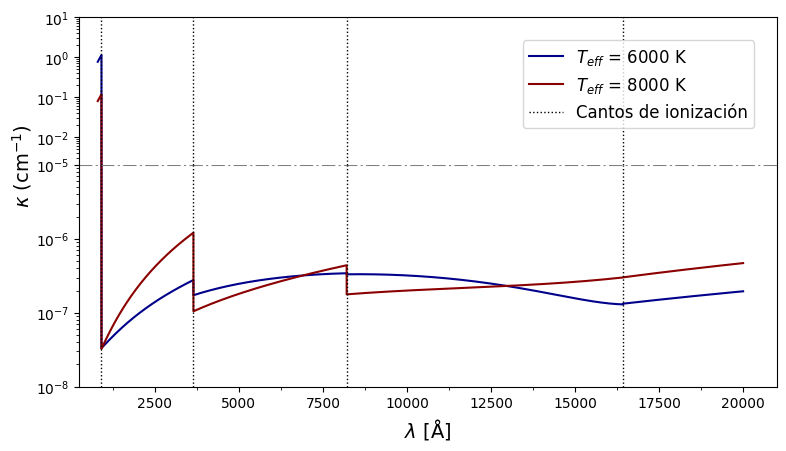

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=np.array([0.4,0.6]))
fig.subplots_adjust(hspace=0)  # adjust space between axes
fig.set_size_inches((9, 4.8))
# Plots
ax1.plot(l_A, k_tot_t6_tau1_cantos_PRUEBA, c='darkblue')
ax2.plot(l_A, k_tot_t6_tau1_cantos_PRUEBA, c='darkblue', label='$T_{eff}$ = 6000 K')
ax1.plot(l_A, k_tot_t8_tau1_cantos_PRUEBA, c='darkred')
ax2.plot(l_A, k_tot_t8_tau1_cantos_PRUEBA, c='darkred', label='$T_{eff}$ = 8000 K')
ax2.axhline(1e-5, ls='-.', c='grey')
ax1.axvline(l1*1e8, ls=':', lw=1, c='k')
ax2.axvline(l1*1e8, ls=':', lw=1, c='k', label='Cantos de ionización')
ax1.axvline(l0*1e8, ls=':', lw=1, c='k')
ax2.axvline(l0*1e8, ls=':', lw=1, c='k')
ax1.axvline(l2*1e8, ls=':', lw=1, c='k')
ax2.axvline(l2*1e8, ls=':', lw=1, c='k')
ax1.axvline(l3*1e8, ls=':', lw=1, c='k')
ax2.axvline(l3*1e8, ls=':', lw=1, c='k')
# Límites ejes
ax1.set_xlim(250, 21000)
ax1.set_ylim(0.2e-2,10)
ax2.set_xlim(250, 21000)
ax2.set_ylim(1e-8,1e-5)
# Escala log en eje y
ax1.set_yscale('log')
ax2.set_yscale('log')
# Ajustar cuadro gráficos para juntarlos
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# Ajustar ticks de los ejes
ax1.tick_params(labelbottom=False)
# ax1.set_yticks(np.array([1, 1e3, 1e6, 1e9, 1e12, 1e15]))
# ax1.set_yticks(np.array([1e-1, 10, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax1.set_yticklabels('',minor=True)
ax2.tick_params(labeltop=False)
ax2.set_xticks(np.arange(1250, 21250, 1250), minor=True) #[1, 1e4, 1e8, 1e12, 1e16]
ax2.set_xticklabels('',minor=True)
# Etiquetas de los ejes
ax1.set_ylabel('$\kappa$ (cm$^{-1}$)', fontsize=14)
ax2.set_xlabel('$\lambda$ [Å]', fontsize=14)
ax1.yaxis.set_label_coords(-0.065, 0)
# Leyendas
ax2.legend(bbox_to_anchor=(0.98, 1.6),fontsize=12) #0.7874136